## Feature Engineering Missing Values 

### Random sampling imputation

In [4]:
import pandas as pd
df=pd.read_csv("train.csv",usecols=["Survived","Age","Fare"])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
#random sample value get
df["Age"].dropna().sample(df["Age"].isna().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [35]:
median = df['Age'].median()

In [58]:
def impute_val(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isna(),variable+"_random"]=random_sample

In [59]:
impute_val(df,'Age',median)

In [60]:
df.head()

,Survived,Age,Fare,Age_median,Age_sample,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline


## visualize

<AxesSubplot:ylabel='Density'>

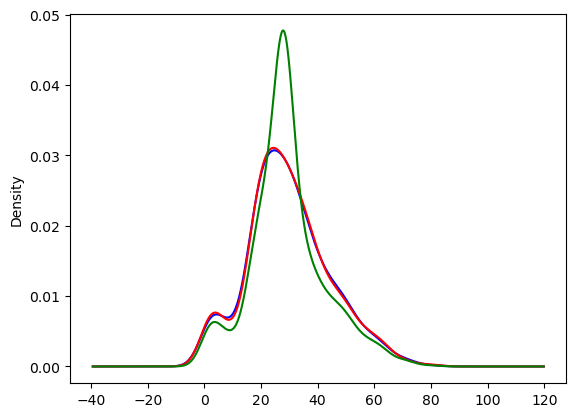

In [76]:
fig =plt.figure()
ax  = fig.add_subplot(111)
df["Age"].plot(kind='kde',color='blue',ax=ax)
df['Age_random'].plot(kind='kde',color='red',ax=ax)

## Compare with median and random sample imputation

<AxesSubplot:ylabel='Density'>

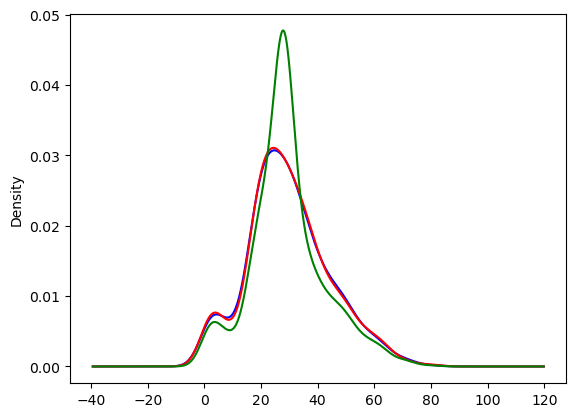

In [78]:
fig =plt.figure()
ax  = fig.add_subplot(111)
df["Age"].plot(kind='kde',color='blue',ax=ax)
df['Age_random'].plot(kind='kde',color='red',ax=ax)
df["Age_median"].plot(kind='kde',ax=ax,color='green')